# Fasttext

Fasttext is a model by facebook AI research. It can be trained on more than 1 billion words in less than 10 minutes using a standard CPU multicore, and classify half a million sentences among 312K
classes in less than a minute. Hence it seems to be a good and fast way for our classification task.
source: https://arxiv.org/pdf/1607.01759.pdf 

We select the fasttext from text.text_classifiers() Hence we use the default fast text in ktrain


# Data download

In [1]:
!wget https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar -xzf aclImdb_v1.tar.gz
!ls

--2021-12-07 20:37:36--  https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: ‘aclImdb_v1.tar.gz’

aclImdb_v1.tar.gz   100%[===================>]  80.23M  29.6MB/s    in 2.7s    

2021-12-07 20:37:39 (29.6 MB/s) - ‘aclImdb_v1.tar.gz’ saved [84125825/84125825]

aclImdb  aclImdb_v1.tar.gz  sample_data


# Alternative with tf.datasets

In [2]:
!pip install tensorflow-datasets > /dev/null

In [3]:
import tensorflow_datasets as tfds

In [4]:
(ds_train,ds_test),ds_info = tfds.load(
    name="imdb_reviews",
    split=["train","test"],
    shuffle_files=True,
    as_supervised=True,
    with_info=True
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteN5PSVG/imdb_reviews-train.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteN5PSVG/imdb_reviews-test.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteN5PSVG/imdb_reviews-unsupervised.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [5]:
ds_info

tfds.core.DatasetInfo(
    name='imdb_reviews',
    version=1.0.0,
    description='Large Movie Review Dataset.
This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training, and 25,000 for testing. There is additional unlabeled data for use as well.',
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
        'text': Text(shape=(), dtype=tf.string),
    }),
    total_num_examples=100000,
    splits={
        'test': 25000,
        'train': 25000,
        'unsupervised': 50000,
    },
    supervised_keys=('text', 'label'),
    citation="""@InProceedings{maas-EtAl:2011:ACL-HLT2011,
      author    = {Maas, Andrew L.  and  Daly, Raymond E.  and  Pham, Peter T.  and  Huang, Dan  and  Ng, Andrew Y.  and  Potts, Christopher},
      title     = {Learning Word

  # Implementation Steps

  1 Basic data cleaning

  2 Preprocess using text.texts_from_df

  3 Define Model

  4 Find Learninf rate

  5 Fit Model

  PS steps explained in comments while implementing

In [6]:
# we create a dataframe from a tensorflow data object
#we take a higher value than 25000 in take() so that we do not miss any values
ds_train = tfds.as_dataframe(ds_train.take(25100), ds_info)
ds_test = tfds.as_dataframe(ds_test.take(25100), ds_info)

In [7]:
ds_train.head(5)
#we see these b's as data converts to bytes hence we need to decode the bytes and do some basic cleaning to the data set, its probably because of utf

,label,text
0,0,"b""This was an absolutely terrible movie. Don't..."
1,0,b'I have been known to fall asleep during film...
2,0,b'Mann photographs the Alberta Rocky Mountains...
3,1,b'This is the kind of film for a snowy Sunday ...
4,1,"b'As others have mentioned, all the women that..."


In [8]:
# As we can see their are some weird characters in between, lets do the very basic cleaning
import re
def basic_clean(txt):
  txt = txt.decode("utf-8") #to remove b's from the beginning of the text and make it string
  txt = re.compile("[.;:!\'?,\"()\[\]]").sub("", txt.lower()) #remove punctuations
  txt = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)").sub(" ", txt.lower()) #remove links
  return txt
ds_train['text'] =  ds_train['text'].apply(basic_clean)
ds_test['text'] =  ds_test['text'].apply(basic_clean)

In [9]:
# cleaned data
ds_train.head(5)

,label,text
0,0,this was an absolutely terrible movie dont be ...
1,0,i have been known to fall asleep during films ...
2,0,mann photographs the alberta rocky mountains i...
3,1,this is the kind of film for a snowy sunday af...
4,1,as others have mentioned all the women that go...


# What is Ktrain and why we use it?

ktrain is a lightweight wrapper for the deep learning library TensorFlow Keras (and other libraries) to help build, train, and deploy neural networks and other machine learning models. 

Ktrain is designed to make deep learning and AI more accessible and easier to apply for both newcomers and experienced practitioners. With only a few lines of code, ktrain allows you to easily and quickly: 

Source:https://pythonrepo.com/repo/amaiya-ktrain-python-deep-learning

In other it makes the implementation of different deep learning models much simpler. As you'll see further.

In [10]:
!pip install ktrain
import ktrain
from ktrain import text #ktrain text is for text data


     |████████████████████████████████| 25.3 MB 1.8 MB/s 
     |████████████████████████████████| 6.8 MB 33.8 MB/s 
     |████████████████████████████████| 981 kB 50.3 MB/s 
     |████████████████████████████████| 263 kB 55.2 MB/s 
     |████████████████████████████████| 2.8 MB 44.6 MB/s 
     |████████████████████████████████| 1.2 MB 57.4 MB/s 
     |████████████████████████████████| 468 kB 66.2 MB/s 
     |████████████████████████████████| 895 kB 51.7 MB/s 
     |████████████████████████████████| 596 kB 39.9 MB/s 
     |████████████████████████████████| 61 kB 418 kB/s 
     |████████████████████████████████| 3.3 MB 46.3 MB/s 
  Created wheel for ktrain: filename=ktrain-0.28.3-py3-none-any.whl size=25292659 sha256=dd46fe32b7e53ab0d5b99058c992a281df9e9359d0510bcfb01a8152660a6a3c
  Stored in directory: /root/.cache/pip/wheels/6a/7e/c3/f46cdfc2b81c54424923b1405d7e670c35cacc11ada9a47b1c
  Created wheel for seqeval: filename=seqeval-0.0.19-py3-none-any.whl size=9929 sha256=8cd47ac121df5da9

In [11]:
(X_train, y_train), (X_test, y_test), preprocess= text.texts_from_df(train_df = ds_train,
                  text_column = 'text',
                  label_columns = 'label',
                  val_df = ds_test,
                  max_features = 20000,
                  ngram_range = 1,
                  maxlen = 400,
                  preprocess_mode='standard')
#we use texts_from_df since the data is in a data frame, train_df is train data, val_df = test data,
#preprocess the data at mode = standard for the data loading function this is used for fast text models
#we use max_features as 20000 and maxlen = 400 for our model since we are using all of the data with stopwords the length of an average sentence is much longer compared to our other tasks
#we use ngram = 1 unigram version
#we give text_cloumn and label_coloumn to map the x train, y train and x test, y test
##text_from_df ktrain will do preprocessing of data from dataframe and will return five variables out of it these variables are (x_train,y_train)(x_test,y_test) and preprocess

['not_label', 'label']
   not_label  label
0        1.0    0.0
1        1.0    0.0
2        1.0    0.0
3        0.0    1.0
4        0.0    1.0
['not_label', 'label']
   not_label  label
0        0.0    1.0
1        0.0    1.0
2        1.0    0.0
3        1.0    0.0
4        0.0    1.0
language: en
Word Counts: 93788
Nrows: 25000
25000 train sequences
train sequence lengths:
	mean : 226
	95percentile : 578
	99percentile : 881
x_train shape: (25000,400)
y_train shape: (25000, 2)
Is Multi-Label? False
25000 test sequences
test sequence lengths:
	mean : 220
	95percentile : 556
	99percentile : 860
x_test shape: (25000,400)
y_test shape: (25000, 2)


In [12]:
#we can see the detailed preprocessing of the data
#model detected the language, word count, changed the shape of train and test data, sequence length further it detected if the problem is multilabel or not and multiple other basic things

In [14]:
text.print_text_classifiers() #different text classifiers from k train

fasttext: a fastText-like model [http://arxiv.org/pdf/1607.01759.pdf]
logreg: logistic regression using a trainable Embedding layer
nbsvm: NBSVM model [http://www.aclweb.org/anthology/P12-2018]
bigru: Bidirectional GRU with pretrained fasttext word vectors [https://fasttext.cc/docs/en/crawl-vectors.html]
standard_gru: simple 2-layer GRU with randomly initialized embeddings
bert: Bidirectional Encoder Representations from Transformers (BERT) from keras_bert [https://arxiv.org/abs/1810.04805]
distilbert: distilled, smaller, and faster BERT from Hugging Face transformers [https://arxiv.org/abs/1910.01108]


In [ ]:
#from the selections above we select fasttext model for this analysis
from keras import backend as K 

K.clear_session()

#here we define the model, a text classifier model, we use preproc as preprocessed data in the standard mode a which we got from previous step, in addition we give training data and define model as fasttext
model = text.text_classifier(name = 'fasttext', train_data = (X_train, y_train),
                             preproc = preprocess)

Is Multi-Label? False
compiling word ID features...
maxlen is 400
done.


In [ ]:
learner = ktrain.get_learner(model, train_data=(X_train, y_train), val_data=(X_test, y_test)) #we define a learner and give in the model defined above, train data and validation data
#get_learner it returns a Learner instance that can be used to tune and train the models.

simulating training for different learning rates... this may take a few moments...
Epoch 1/1024
782/782 [==============================] - 9s 10ms/step - loss: 1.0822 - accuracy: 0.5030
Epoch 2/1024
782/782 [==============================] - 8s 10ms/step - loss: 0.7180 - accuracy: 0.5922
Epoch 3/1024
782/782 [==============================] - 3s 4ms/step - loss: 0.8470 - accuracy: 0.4979


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


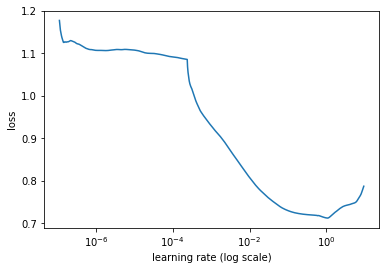

In [ ]:
learner.lr_find() #find optimal learning rate
learner.lr_plot()

In [ ]:
learner.fit_onecycle(lr = 0.01, epochs = 10) #we use learning rate of 0.01 and epochs of 10
#fit_onecycle trains with onecycle policy
#one cycle policy is picking the right learning rate at different iterations helps model to converge quickly. It follows the Cyclical Learning Rate (CLR) to obtain faster training time
#Specifically, it uses one cycle that is smaller than the total number of iterations/epochs and allow learning rate to decrease several orders of magnitude less than the initial learning rate for the remaining iterations (i.e. last few iterations). Source: https://derekchia.com/the-1-cycle-policy/ 
#onecycle also helps the model to be trained in reduced epochs



begin training using onecycle policy with max lr of 0.01...
Epoch 1/10
782/782 [==============================] - 34s 14ms/step - loss: 0.6486 - accuracy: 0.6569 - val_loss: 0.3890 - val_accuracy: 0.8338
Epoch 2/10
782/782 [==============================] - 11s 14ms/step - loss: 0.4285 - accuracy: 0.8084 - val_loss: 0.3387 - val_accuracy: 0.8574
Epoch 3/10
782/782 [==============================] - 11s 14ms/step - loss: 0.3731 - accuracy: 0.8397 - val_loss: 0.3445 - val_accuracy: 0.8579
Epoch 4/10
782/782 [==============================] - 11s 14ms/step - loss: 0.3416 - accuracy: 0.8564 - val_loss: 0.3430 - val_accuracy: 0.8584
Epoch 5/10
782/782 [==============================] - 14s 18ms/step - loss: 0.3378 - accuracy: 0.8601 - val_loss: 0.3499 - val_accuracy: 0.8546
Epoch 6/10
782/782 [==============================] - 11s 14ms/step - loss: 0.3088 - accuracy: 0.8737 - val_loss: 0.3490 - val_accuracy: 0.8508
Epoch 7/10
782/782 [==============================] - 11s 14ms/step - loss

# Conclusion

As the name suggests fast text is a much faster and efficient way to reach a good level of train accuracy compared to its neural network counterparts which we implemented.As it seems it understands the context quite quickly for the data and classifies it.

It reaches a pretty high training accuracy 93.14% quickly and very low loss of 16.91 and a decent validation accuracy as well of 86.2%.
